In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from environment import k_BanditGame
from agent import SimpleAgent, OptimisticSimpleAgent, UCBSimpleAgent
from utils import experiment


In [3]:
greedy_params = {
    "agent": SimpleAgent,
    "env": k_BanditGame,
    "agent_params": {
        "epsilon": 0.0,
        "step_policy": "average",
    },
    "n_runs": 2000,
    "n_step": 1000,
}
greedy_optimal_actions, greedy_rewards = experiment(**greedy_params)

{'agent': <class 'agent.SimpleAgent'>, 'env': <class 'environment.k_BanditGame'>, 'agent_params': {'epsilon': 0.0, 'step_policy': 'average'}, 'n_runs': 2000, 'n_step': 1000}


In [4]:
greedy_params = {
    "agent": SimpleAgent,
    "env": k_BanditGame,
    "agent_params": {
        "epsilon": 0.1,
        "step_policy": "average",
    },
    "n_runs": 2000,
    "n_step": 1000,
}
eps_1_optimal_actions, eps_1_reward  = experiment(**greedy_params)

{'agent': <class 'agent.SimpleAgent'>, 'env': <class 'environment.k_BanditGame'>, 'agent_params': {'epsilon': 0.1, 'step_policy': 'average'}, 'n_runs': 2000, 'n_step': 1000}


In [5]:
greedy_params = {
    "agent": SimpleAgent,
    "env": k_BanditGame,
    "agent_params": {
        "epsilon": 0.01,
        "step_policy": "average",
    },
    "n_runs": 2000,
    "n_step": 1000,
}
eps_2_optimal_actions, eps_2_reward  = experiment(**greedy_params)

{'agent': <class 'agent.SimpleAgent'>, 'env': <class 'environment.k_BanditGame'>, 'agent_params': {'epsilon': 0.01, 'step_policy': 'average'}, 'n_runs': 2000, 'n_step': 1000}


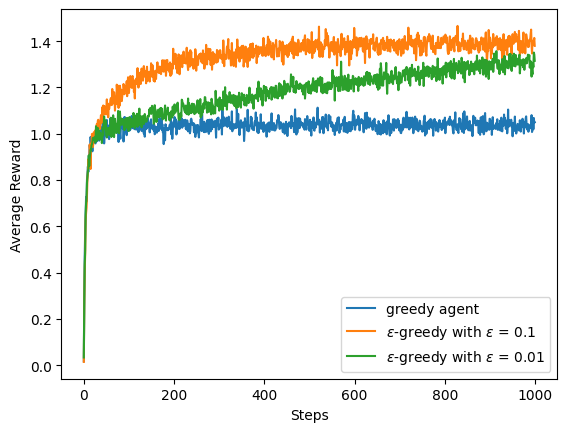

In [6]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(greedy_rewards, label="greedy agent")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.plot(eps_2_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.01')
plt.legend()

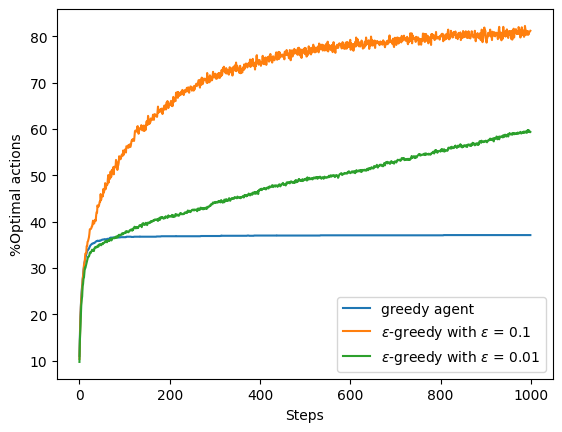

In [7]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(greedy_optimal_actions * 100, label="greedy agent")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.plot(eps_2_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.01')
plt.legend()

In [8]:
greedy_params = {
    "agent": OptimisticSimpleAgent,
    "env": k_BanditGame,
    "agent_params": {
        "epsilon": 0.00,
        "optimistic_value": 5.0,
        "step_policy": "constant",
        "step_size": 0.1,
        
    },
    "n_runs": 2000,
    "n_step": 1000,
}
optimistic_greedy_optimal_actions, optimistic_greedy_reward  = experiment(**greedy_params)

{'agent': <class 'agent.OptimisticSimpleAgent'>, 'env': <class 'environment.k_BanditGame'>, 'agent_params': {'epsilon': 0.0, 'optimistic_value': 5.0, 'step_policy': 'constant', 'step_size': 0.1}, 'n_runs': 2000, 'n_step': 1000}


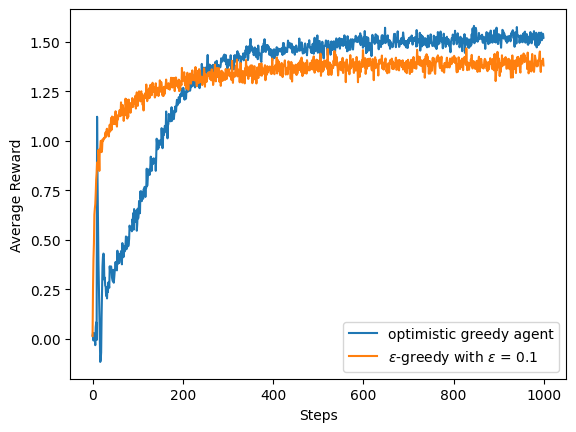

In [9]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(optimistic_greedy_reward, label="optimistic greedy agent")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

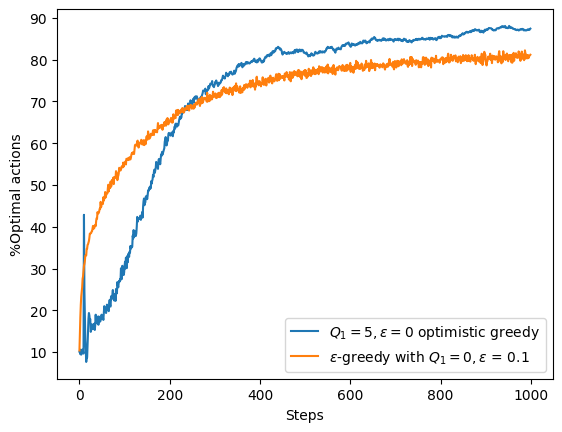

In [10]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(optimistic_greedy_optimal_actions * 100, label=r"$Q_{1} = 5, \epsilon = 0$ optimistic greedy")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $Q_{1} = 0, \epsilon$ = 0.1')
plt.legend()

In [11]:
greedy_params = {
    "agent": UCBSimpleAgent,
    "env": k_BanditGame,
    "agent_params": {
        "step_policy": "average",
        "ucb_c": 2.0,
    },
    "n_runs": 2000,
    "n_step": 1000,
}
ucb_optimal_actions, ucb_reward  = experiment(**greedy_params)

{'agent': <class 'agent.UCBSimpleAgent'>, 'env': <class 'environment.k_BanditGame'>, 'agent_params': {'step_policy': 'average', 'ucb_c': 2.0}, 'n_runs': 2000, 'n_step': 1000}


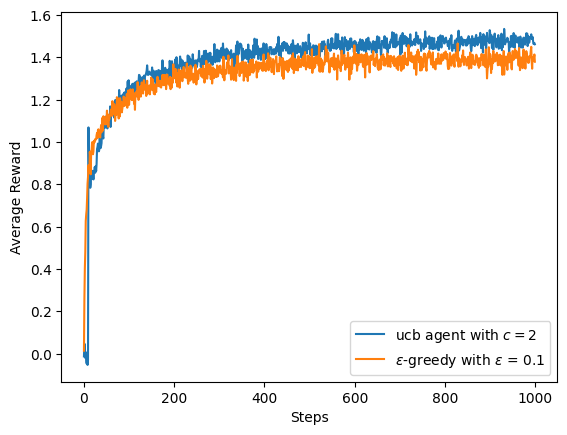

In [12]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(ucb_reward, label="ucb agent with $c = 2$")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

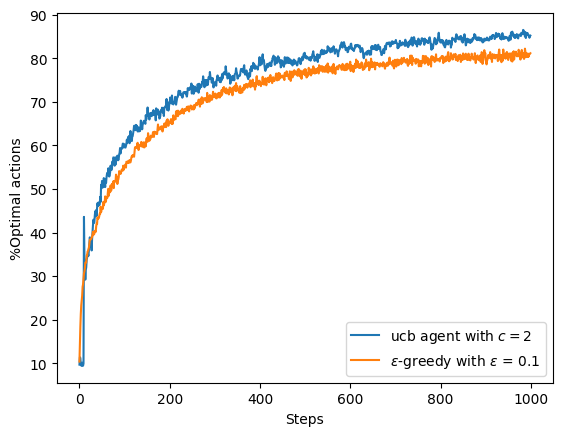

In [13]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(ucb_optimal_actions * 100, label="ucb agent with $c = 2$")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

In [14]:
greedy_params = {
    "agent": UCBSimpleAgent,
    "env": k_BanditGame,
    "agent_params": {
        "step_policy": "average",
        "ucb_c": 1.0,
    },
    "n_runs": 2000,
    "n_step": 1000,
}
ucb_1_optimal_actions, ucb_1_reward  = experiment(**greedy_params)

{'agent': <class 'agent.UCBSimpleAgent'>, 'env': <class 'environment.k_BanditGame'>, 'agent_params': {'step_policy': 'average', 'ucb_c': 1.0}, 'n_runs': 2000, 'n_step': 1000}


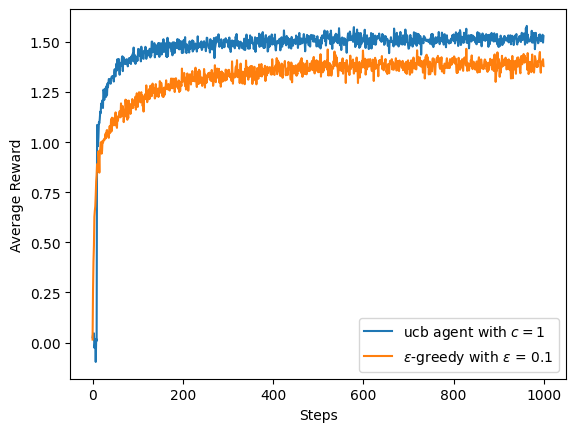

In [15]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.plot(ucb_1_reward, label="ucb agent with $c = 1$")
plt.plot(eps_1_reward, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()

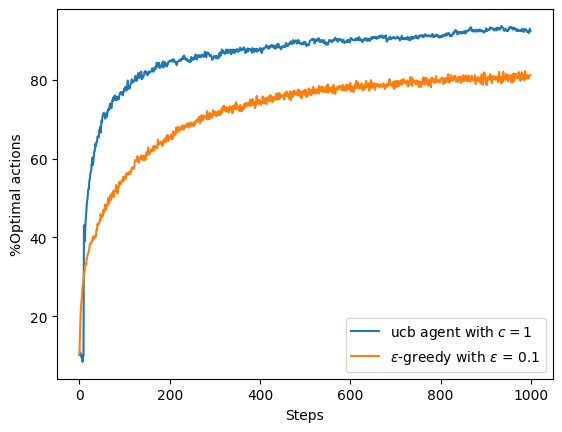

In [16]:
plt.xlabel("Steps")
plt.ylabel("%Optimal actions")
plt.plot(ucb_1_optimal_actions * 100, label="ucb agent with $c = 1$")
plt.plot(eps_1_optimal_actions * 100, label=r'$\epsilon$-greedy with $\epsilon$ = 0.1')
plt.legend()